In [36]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.impute import SimpleImputer
import seaborn as sb
# Importazione delle librerie necessarie per l'implementazione del modello di ml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score



In [37]:
df_vino_rosso = pd.read_csv('https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/wine_quality/winequality-red.csv', sep=';', encoding='latin1')
df_vino_bianco = pd.read_csv('https://raw.githubusercontent.com/FabioGagliardiIts/datasets/main/wine_quality/winequality-red.csv', sep=';', encoding='latin1')


# Aggiungi una colonna "tow" --> type of wine con valore 0
df_vino_rosso['tow'] = 0

# Aggiungi una colonna "tow"--> type of wine con valore 1
df_vino_bianco['tow'] = 1

# Unisci i due DataFrame
vini = pd.concat([df_vino_rosso, df_vino_bianco], ignore_index=True)


vini.insert( 0, "id", range(0, 0+len(vini)))

vini.columns = ('id','fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality','tow')


# Salva il file unito nella cartella "dati"
vini.to_csv("vino.csv")


display(vini)


,id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,tow
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,3193,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
3194,3194,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
3195,3195,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
3196,3196,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data):
   12 - quality (score between 0 and 10)

In [38]:
vini.describe()

,id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,tow
count,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000
mean,1598.500000,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.500000
std,923.327407,1.740824,0.179032,0.194771,1.409708,0.047058,10.458521,32.890179,0.001887,0.154362,0.169480,1.065501,0.807443,0.500078
min,0.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,799.250000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,1598.500000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.500000
75%,2397.750000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997837,3.400000,0.730000,11.100000,6.000000,1.000000
max,3197.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [39]:
#cerco per sicurezza se nell dataframe ci sono valori nulli e visto che non ce ne sono non faccio nulla

null_counts = vini.isna().sum()
display(null_counts)


id                      0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
tow                     0
dtype: int64

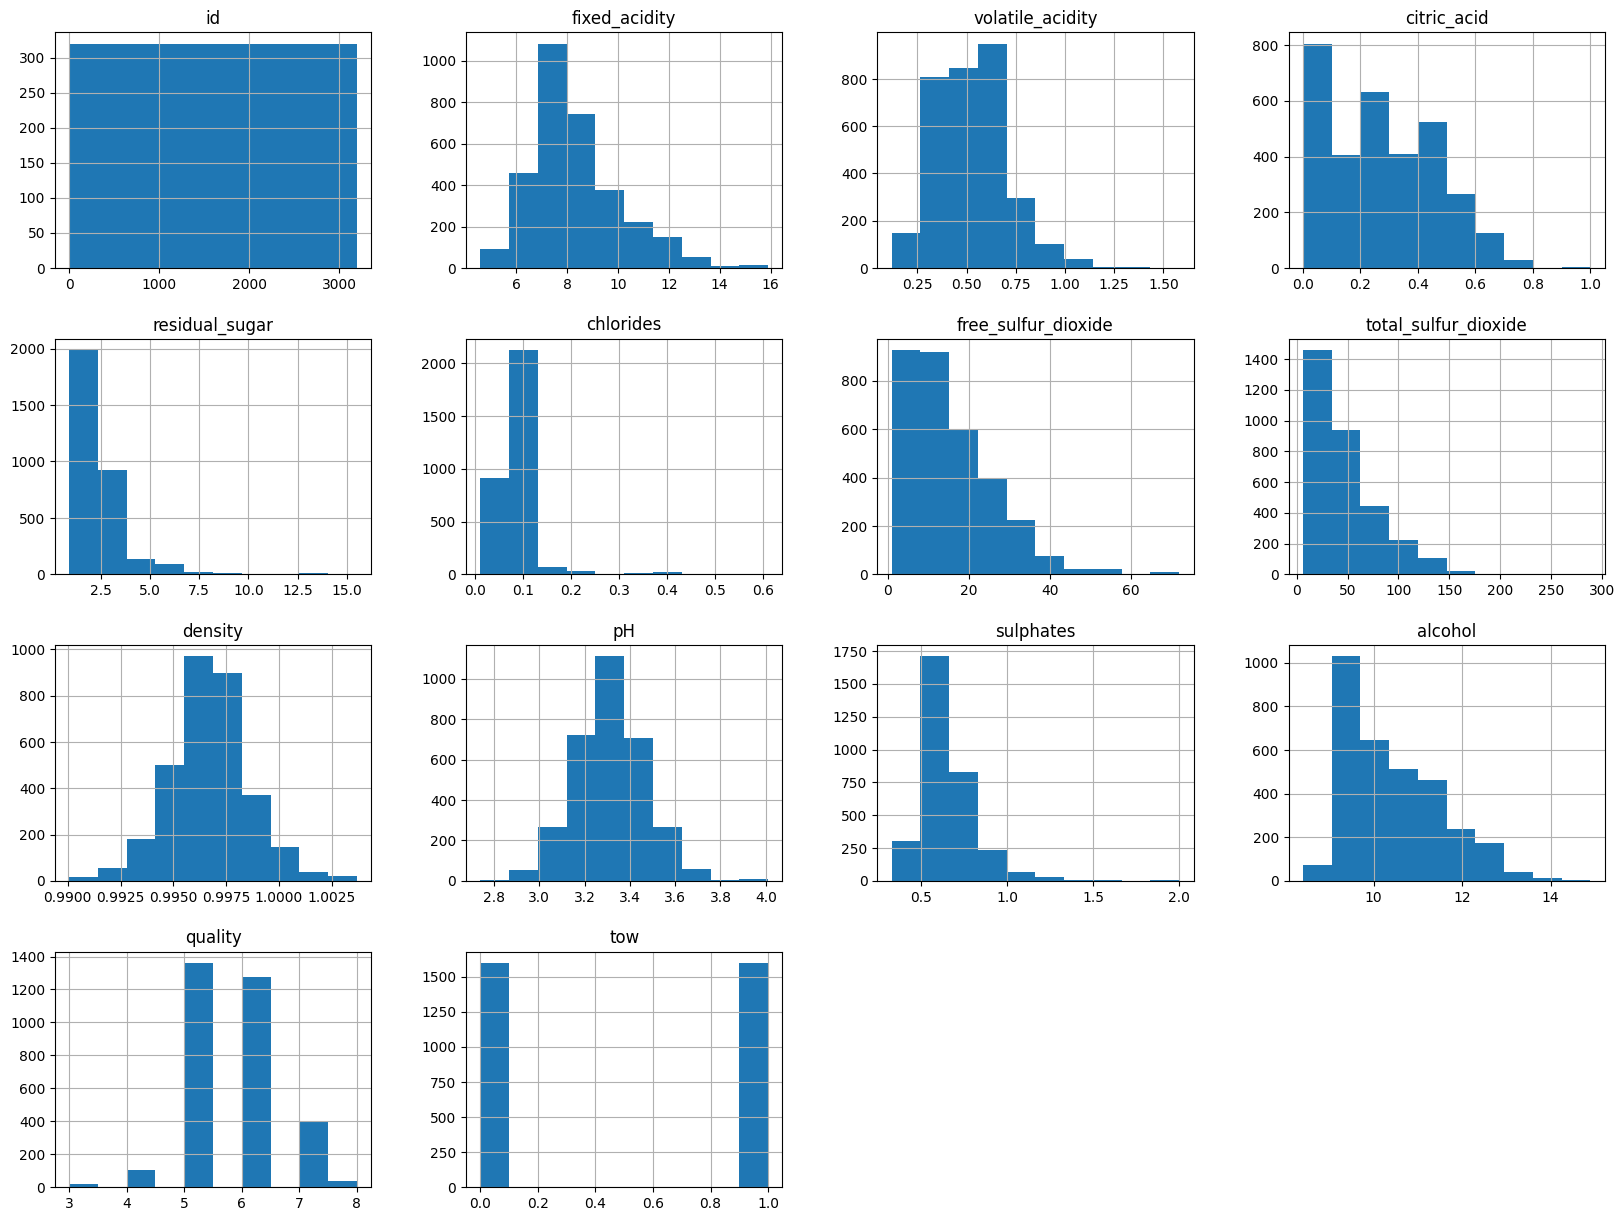

In [40]:
vini.hist(figsize=(20,15))
plt.show()



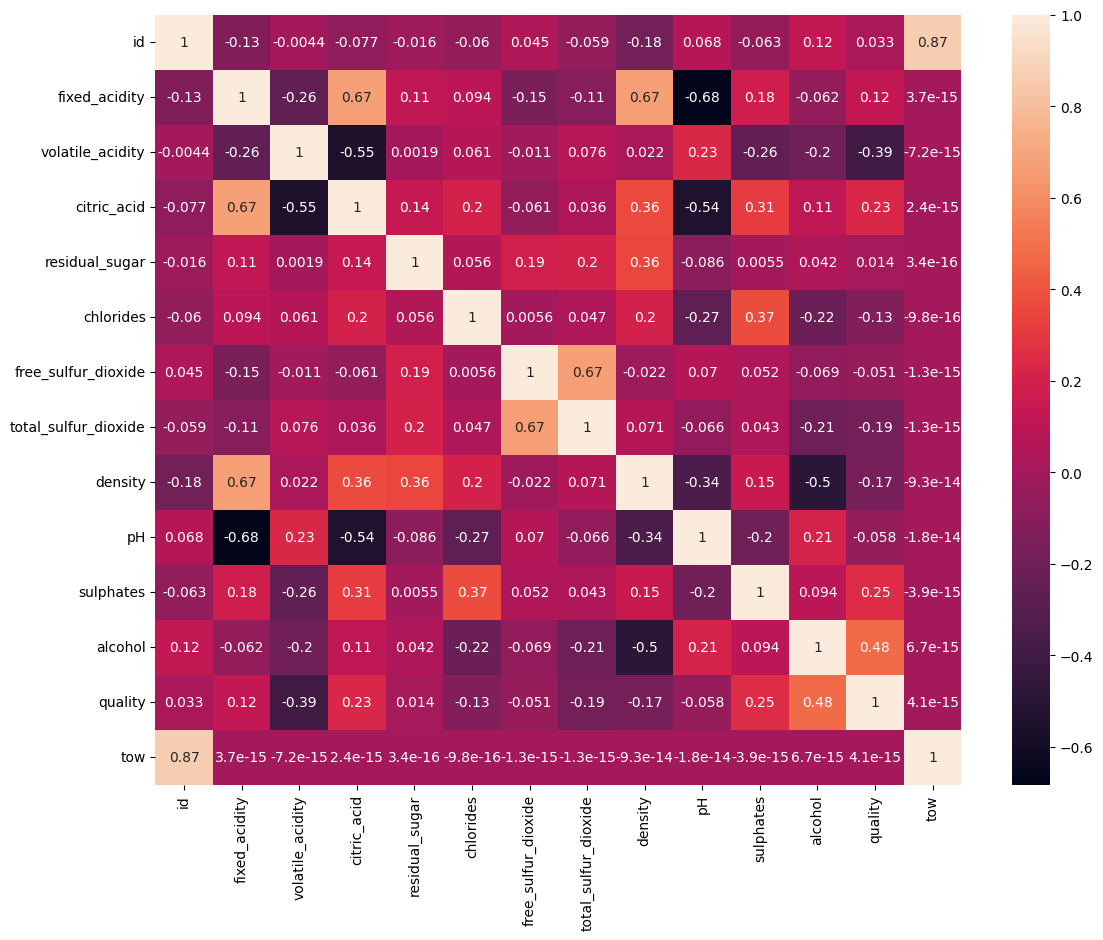

In [41]:
plt.figure(figsize=(13, 10))
corr_matrix = vini.corr()

sns.heatmap(corr_matrix, annot=True)
plt.show()

In [42]:
#droppiamo la colonna total sulfur dioxide visto che supera iol 70
df_vini=vini.drop('total_sulfur_dioxide',axis=1)

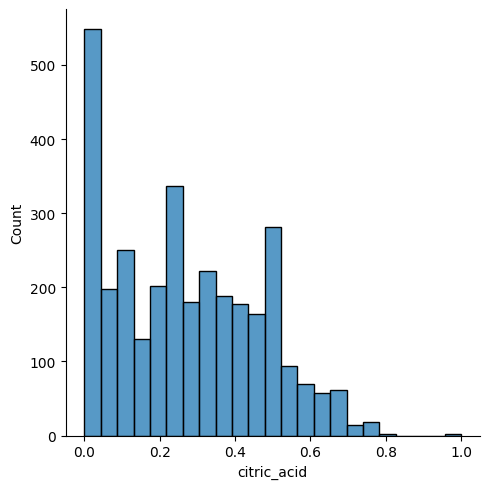

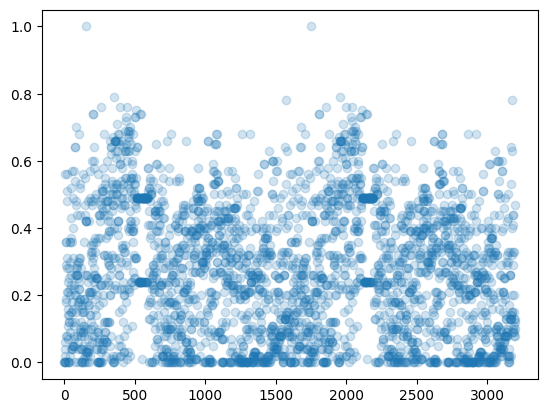

In [43]:
#studio variabili

df_temp=df_vini['citric_acid']
sns.displot(df_temp)
plt.show()

temp=df_temp.to_numpy()

plt.scatter(np.arange(temp.size), temp, alpha=0.2)
plt.show()

In [44]:
corr_labels = corr_matrix['quality'].sort_values(ascending=False)
print(corr_labels)

quality                 1.000000e+00
alcohol                 4.761663e-01
sulphates               2.513971e-01
citric_acid             2.263725e-01
fixed_acidity           1.240516e-01
id                      3.322630e-02
residual_sugar          1.373164e-02
tow                     4.125066e-15
free_sulfur_dioxide    -5.065606e-02
pH                     -5.773139e-02
chlorides              -1.289066e-01
density                -1.749192e-01
total_sulfur_dioxide   -1.851003e-01
volatile_acidity       -3.905578e-01
Name: quality, dtype: float64


In [45]:
# Creazione di una nuova colonna ('best quality') che iterando sulla colonna quality assegna il valore 1 (se la qualità del vino è > 5) o il valore 0 (se inferiore di 5)
df_vini['best_quality'] = [1 if x > 5.8 else 0 for x in df_vini.quality]
display(df_vini)

,id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality,tow,best_quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0,0
1,1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5,0,0
2,2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5,0,0
3,3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6,0,1
4,4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,3193,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5,1,0
3194,3194,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6,1,1
3195,3195,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6,1,1
3196,3196,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5,1,0


In [46]:
df_vini.columns = ('id','fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality','tow','best_quality')


# Salva il file unito nella cartella "dati"
df_vini.to_csv("vino.csv")

In [47]:
# Selezione delle features e della colonna target
features = df_vini.drop(['quality', 'best_quality'], axis=1)
target = df_vini['best_quality']

# split di training e testing delle features e del target
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=40)

# shape delle tuple di training e di testing
x_train.shape, x_test.shape


((2558, 12), (640, 12))

In [48]:
# Normalizzazione dei valori
norm = MinMaxScaler()
xtrain = norm.fit_transform(x_train)
xtest = norm.transform(x_test)
print(xtrain)
print(xtest)

[[0.89020957 0.24778761 0.29452055 ... 0.20958084 0.32307692 1.        ]
 [0.15545824 0.2300885  0.15068493 ... 0.2754491  0.41538462 0.        ]
 [0.47638411 0.19469027 0.24657534 ... 0.16167665 0.30769231 0.        ]
 ...
 [0.69221145 0.40707965 0.43493151 ... 0.61676647 0.27692308 1.        ]
 [0.64279012 0.38053097 0.32191781 ... 0.1497006  0.29230769 1.        ]
 [0.70910228 0.47787611 0.41780822 ... 0.14371257 0.4        1.        ]]
[[0.41413825 0.18584071 0.23287671 ... 0.16167665 0.33846154 0.        ]
 [0.70096966 0.46902655 0.28767123 ... 0.17365269 0.15384615 1.        ]
 [0.14576165 0.50442478 0.26027397 ... 0.23353293 0.47692308 0.        ]
 ...
 [0.92086331 0.31858407 0.21917808 ... 0.11976048 0.27692308 1.        ]
 [0.76446669 0.15929204 0.35616438 ... 0.19760479 0.21538462 1.        ]
 [0.58742571 0.38053097 0.19178082 ... 0.26347305 0.32307692 1.        ]]


In [49]:

# Inizializzazione del modello di regressione logistica
logistic_model = LogisticRegression()

# Training del modello
logistic_model.fit(xtrain, y_train)

# PrevisionI sui test
y_pred_logistic = logistic_model.predict(xtest)

# Definizione della precisione del modello
accuracy = accuracy_score(y_test, y_pred_logistic)
print('Precisione del modello:', accuracy)

print('\n')

# Inizializzazione della matrice di confusione
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Definizione dell'errore quadrato medio
mse = mean_squared_error(y_test, y_pred_logistic)
print('MSE:', mse)

# Definizione di r2
r2 = r2_score(y_test, y_pred_logistic)
print('R2:', r2)


Precisione del modello: 0.7296875


MSE: 0.2703125
R2: -0.08395989974937357


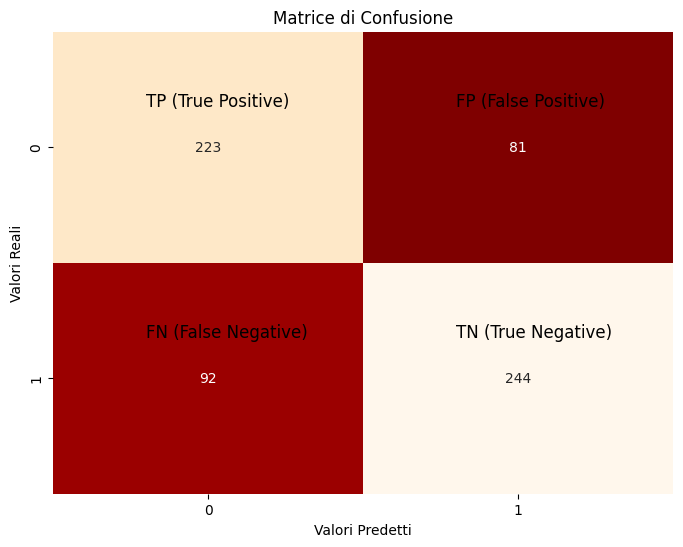

In [50]:
# Dataviz: grafico della matrice di confusione

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="OrRd_r", cbar=False)

# label della matrice di confusione
plt.text(0.3, 0.3, 'TP (True Positive)', fontsize=12, color='black', verticalalignment='center')
plt.text(1.3, 0.3, 'FP (False Positive)', fontsize=12, color='black', verticalalignment='center')
plt.text(0.3, 1.3, 'FN (False Negative)', fontsize=12, color='black', verticalalignment='center')
plt.text(1.3, 1.3, 'TN (True Negative)', fontsize=12, color='black', verticalalignment='center')

plt.xlabel('Valori Predetti')
plt.ylabel('Valori Reali')
plt.title('Matrice di Confusione')
plt.show()